___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
#pip install pandas-datareader

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
#to fix TypeError: string indices must be integers
#or replace data_source = 'yahoo' for data_source = 'stooq'
#!pip install yfinance
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

In [3]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)
#start='2006-1-1'
#end='2016-1-1'

#data_source = "yahoo" #'google' has been discontinued #data_source = 'stooq' read previous comment Miguel.

In [4]:
# Bank of America
BAC = data.DataReader("BAC", start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
#CitiGroup C
C = data.DataReader("C", start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
#Goldman Sachs GS
GS = data.DataReader("GS", start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
#JPMorgan Chase JPM
JPM = data.DataReader("JPM", start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
#Morgan Stanley MS
MS = data.DataReader("MS", start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
#Wells Fargo WFC
WFC = data.DataReader("WFC", start, end)

[*********************100%***********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ['C', 'GS', 'MS', 'WFC', 'JPM', 'BAC']
tickers = sorted(tickers)
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [19]:
#______________________________________________________learn hot to concat______

In [11]:
d1 = pd.DataFrame(dict(A=.1, B=.2, C=.3), [2, 3])
d2 = pd.DataFrame(dict(B=.4, C=.5, D=.6), [1, 2])
d3 = pd.DataFrame(dict(A=.7, B=.8, D=.9), [1, 3])

In [12]:
d1


,A,B,C
2,0.1,0.2,0.3
3,0.1,0.2,0.3


In [13]:
pd.concat([d1, d2, d3])

,A,B,C,D
2,0.1,0.2,0.3,NaN
3,0.1,0.2,0.3,NaN
1,NaN,0.4,0.5,0.6
2,NaN,0.4,0.5,0.6
1,0.7,0.8,NaN,0.9
3,0.7,0.8,NaN,0.9


In [14]:
pd.concat([d1, d2, d3], keys=['d1', 'd2', 'd3'])

A    B    C    D
d1 2  0.1  0.2  0.3  NaN
   3  0.1  0.2  0.3  NaN
d2 1  NaN  0.4  0.5  0.6
   2  NaN  0.4  0.5  0.6
d3 1  0.7  0.8  NaN  0.9
   3  0.7  0.8  NaN  0.9

In [15]:
pd.concat([d1, d2, d3], keys=['d1', 'd2', 'd3'], levels=[['d1', 'd2', 'd3']])

A    B    C    D
d1 2  0.1  0.2  0.3  NaN
   3  0.1  0.2  0.3  NaN
d2 1  NaN  0.4  0.5  0.6
   2  NaN  0.4  0.5  0.6
d3 1  0.7  0.8  NaN  0.9
   3  0.7  0.8  NaN  0.9

In [17]:
df = pd.concat([d1, d2, d3], keys=['d1', 'd2', 'd3'], levels=[['d1', 'd2', 'd3', 'd4']])

In [18]:
df

A    B    C    D
d1 2  0.1  0.2  0.3  NaN
   3  0.1  0.2  0.3  NaN
d2 1  NaN  0.4  0.5  0.6
   2  NaN  0.4  0.5  0.6
d3 1  0.7  0.8  NaN  0.9
   3  0.7  0.8  NaN  0.9

In [20]:
#_____________________________________________________________________finish learning

In [21]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [24]:
bank_stocks.head()

BAC                                   \
                                Open       High        Low      Close   
Date                                                                    
2006-01-03 00:00:00-05:00  46.919998  47.180000  46.150002  47.080002   
2006-01-04 00:00:00-05:00  47.000000  47.240002  46.450001  46.580002   
2006-01-05 00:00:00-05:00  46.580002  46.830002  46.320000  46.639999   
2006-01-06 00:00:00-05:00  46.799999  46.910000  46.349998  46.570000   
2006-01-09 00:00:00-05:00  46.720001  46.970001  46.360001  46.599998   

                                                         C              \
                           Adj Close    Volume        Open        High   
Date                                                                     
2006-01-03 00:00:00-05:00  32.956562  16296700  490.000000  493.799988   
2006-01-04 00:00:00-05:00  32.606552  17757900  488.600006  491.000000   
2006-01-05 00:00:00-05:00  32.648544  14970700  484.399994  487.799988   
2006-01-06 00:00:00-05:00  32.599556  12599800  488.799988  489.000000   
2006-01-09 00:00:00-05:00  32.620564  15619400  486.000000  487.399994   

                                                   ...         MS             \
                                  Low       Close  ...        Low      Close   
Date                                               ...                         
2006-01-03 00:00:00-05:00  481.100006  492.899994  ...  56.740002  58.310001   
2006-01-04 00:00:00-05:00  483.500000  483.799988  ...  58.349998  58.349998   
2006-01-05 00:00:00-05:00  484.000000  486.200012  ...  58.020000  58.509998   
2006-01-06 00:00:00-05:00  482.000000  486.200012  ...  58.049999  58.570000   
2006-01-09 00:00:00-05:00  483.000000  483.899994  ...  58.619999  59.189999   

                                                     WFC             \
                           Adj Close   Volume       Open       High   
Date                                                                  
2006-01-03 00:00:00-05:00  34.607506  5377000  31.600000  31.975000   
2006-01-04 00:00:00-05:00  34.631241  7977800  31.799999  31.820000   
2006-01-05 00:00:00-05:00  34.726192  5778000  31.500000  31.555000   
2006-01-06 00:00:00-05:00  34.761803  6889800  31.580000  31.775000   
2006-01-09 00:00:00-05:00  35.129784  4144500  31.674999  31.825001   

                                                                      
                                 Low      Close  Adj Close    Volume  
Date                                                                  
2006-01-03 00:00:00-05:00  31.195000  31.900000  19.849182  11016400  
2006-01-04 00:00:00-05:00  31.365000  31.530001  19.618965  10870000  
2006-01-05 00:00:00-05:00  31.309999  31.495001  19.597176  10158000  
2006-01-06 00:00:00-05:00  31.385000  31.680000  19.712296   8403800  
2006-01-09 00:00:00-05:00  31.555000  31.674999  19.709185   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [25]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [27]:
#bank_stocks.head()

** Check the head of the bank_stocks dataframe.**

In [28]:
bank_stocks.head()

Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Date                                                                    
2006-01-03 00:00:00-05:00  46.919998  47.180000  46.150002  47.080002   
2006-01-04 00:00:00-05:00  47.000000  47.240002  46.450001  46.580002   
2006-01-05 00:00:00-05:00  46.580002  46.830002  46.320000  46.639999   
2006-01-06 00:00:00-05:00  46.799999  46.910000  46.349998  46.570000   
2006-01-09 00:00:00-05:00  46.720001  46.970001  46.360001  46.599998   

Bank Ticker                                              C              \
Stock Info                 Adj Close    Volume        Open        High   
Date                                                                     
2006-01-03 00:00:00-05:00  32.956562  16296700  490.000000  493.799988   
2006-01-04 00:00:00-05:00  32.606552  17757900  488.600006  491.000000   
2006-01-05 00:00:00-05:00  32.648544  14970700  484.399994  487.799988   
2006-01-06 00:00:00-05:00  32.599556  12599800  488.799988  489.000000   
2006-01-09 00:00:00-05:00  32.620564  15619400  486.000000  487.399994   

Bank Ticker                                        ...         MS             \
Stock Info                        Low       Close  ...        Low      Close   
Date                                               ...                         
2006-01-03 00:00:00-05:00  481.100006  492.899994  ...  56.740002  58.310001   
2006-01-04 00:00:00-05:00  483.500000  483.799988  ...  58.349998  58.349998   
2006-01-05 00:00:00-05:00  484.000000  486.200012  ...  58.020000  58.509998   
2006-01-06 00:00:00-05:00  482.000000  486.200012  ...  58.049999  58.570000   
2006-01-09 00:00:00-05:00  483.000000  483.899994  ...  58.619999  59.189999   

Bank Ticker                                          WFC             \
Stock Info                 Adj Close   Volume       Open       High   
Date                                                                  
2006-01-03 00:00:00-05:00  34.607506  5377000  31.600000  31.975000   
2006-01-04 00:00:00-05:00  34.631241  7977800  31.799999  31.820000   
2006-01-05 00:00:00-05:00  34.726192  5778000  31.500000  31.555000   
2006-01-06 00:00:00-05:00  34.761803  6889800  31.580000  31.775000   
2006-01-09 00:00:00-05:00  35.129784  4144500  31.674999  31.825001   

Bank Ticker                                                           
Stock Info                       Low      Close  Adj Close    Volume  
Date                                                                  
2006-01-03 00:00:00-05:00  31.195000  31.900000  19.849182  11016400  
2006-01-04 00:00:00-05:00  31.365000  31.530001  19.618965  10870000  
2006-01-05 00:00:00-05:00  31.309999  31.495001  19.597176  10158000  
2006-01-06 00:00:00-05:00  31.385000  31.680000  19.712296   8403800  
2006-01-09 00:00:00-05:00  31.555000  31.674999  19.709185   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [38]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()
#or 
#bank_stocks.xs(key='Close',axis=1,level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [39]:
#How do you find the index of a max value in Pandas?
bank_stocks.xs(key='Close', axis=1, level='Stock Info').idxmax()

Bank Ticker
BAC   2006-11-16 00:00:00-05:00
C     2006-12-27 00:00:00-05:00
GS    2007-10-31 00:00:00-04:00
JPM   2015-07-22 00:00:00-04:00
MS    2007-06-14 00:00:00-04:00
WFC   2015-07-22 00:00:00-04:00
dtype: datetime64[ns, America/New_York]

In [34]:
bank_stocks.xs(key='BAC',axis=1,level='Bank Ticker').max()
#or 
#bank_stocks.xs(key='BAC',axis=1,level=0).max()

Stock Info
Open         5.504000e+01
High         5.508000e+01
Low          5.482000e+01
Close        5.490000e+01
Adj Close    3.985569e+01
Volume       1.226791e+09
dtype: float64

In [36]:
#How do you find the index of a max value in Pandas?
bank_stocks.xs(key='BAC',axis=1,level='Bank Ticker').idxmax()

Stock Info
Open        2006-11-21 00:00:00-05:00
High        2006-11-20 00:00:00-05:00
Low         2006-11-17 00:00:00-05:00
Close       2006-11-16 00:00:00-05:00
Adj Close   2007-10-05 00:00:00-04:00
Volume      2009-12-04 00:00:00-05:00
dtype: datetime64[ns, America/New_York]

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [42]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00-05:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00-05:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00-05:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [43]:
returns.index = pd.to_datetime(returns.index).date

In [44]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [83]:
#returns.reset_index(inplace=True)

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [55]:
import seaborn as sn

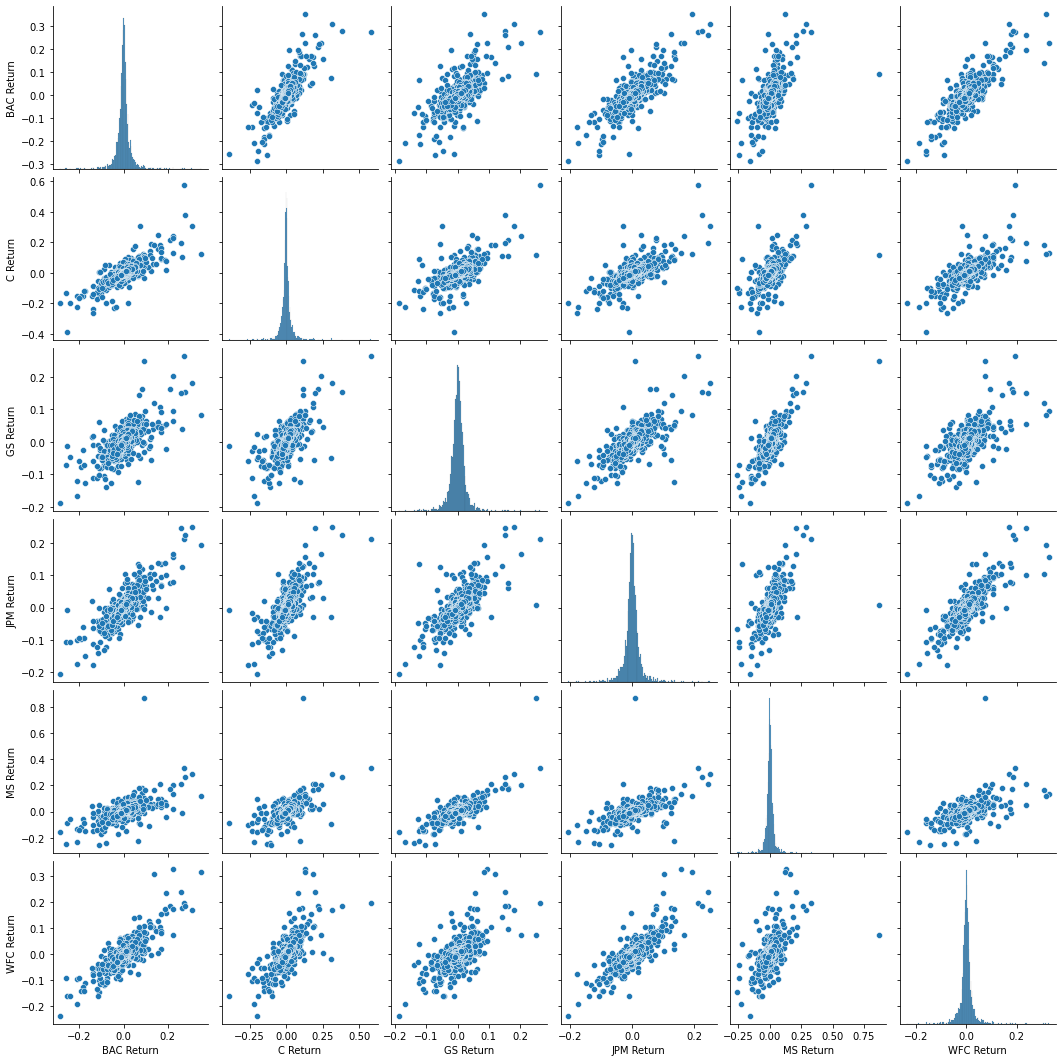

In [56]:
sn.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [45]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [46]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [47]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [48]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [49]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [50]:
startdate = pd.to_datetime('2015-01-01').date()
enddate = pd.to_datetime('2015-12-31').date()

In [51]:
returns[startdate:enddate].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [52]:
MS_return_2015 = returns[startdate:enddate]['MS Return']

In [53]:
MS_return_2015

2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64

C:\Users\migue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

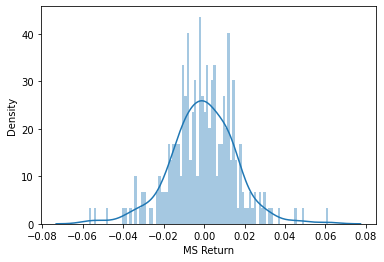

In [57]:
sn.distplot(MS_return_2015, bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [58]:
startdate = pd.to_datetime('2008-01-01').date()
enddate = pd.to_datetime('2008-12-31').date()

In [59]:
C_return_2015 = returns[startdate:enddate]['C Return']

C:\Users\migue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

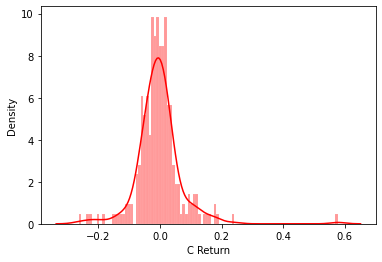

In [60]:
sn.distplot(C_return_2015, bins=100, color="red", hist_kws=dict(edgecolor="w", linewidth=0.2))

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [63]:
bank_stocks.index = pd.to_datetime(bank_stocks.index).date
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956562  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606552  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648544  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620564  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
2006-01-03   58.310001  34.607506  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.631241  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.726192  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.761803  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  35.129784  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
2006-01-03   31.900000  19.849182  11016400  
2006-01-04   31.530001  19.618965  10870000  
2006-01-05   31.495001  19.597176  10158000  
2006-01-06   31.680000  19.712296   8403800  
2006-01-09   31.674999  19.709185   5619600  

[5 rows x 36 columns]

In [65]:
bank_stocks_close = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
bank_stocks_close

Bank Ticker,BAC,C,GS,JPM,MS,WFC
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001
2015-12-30,17.049999,52.299999,182.009995,66.589996,32.230000,54.889999


In [67]:
from matplotlib import pyplot as plt

Text(0.5, 25.0, 'date')

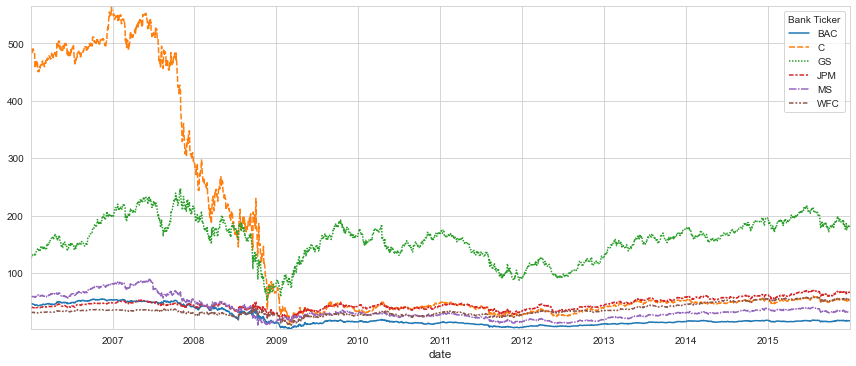

In [93]:
plt.figure(figsize=(12,5))
sns.lineplot(data=bank_stocks_close)
plt.margins(x=0, y=0)
plt.tight_layout()
plt.xlabel('date', fontsize=12)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [120]:
BAC.index = pd.to_datetime(BAC.index).date
BAC.index = BAC.index.map(str)
BAC

,Open,High,Low,Close,Adj Close,Volume
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.956562,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.606552,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.648544,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.599556,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.620564,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.910029,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.789156,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.918657,45670400
2015-12-30,17.200001,17.240000,17.040001,17.049999,14.720088,35066400


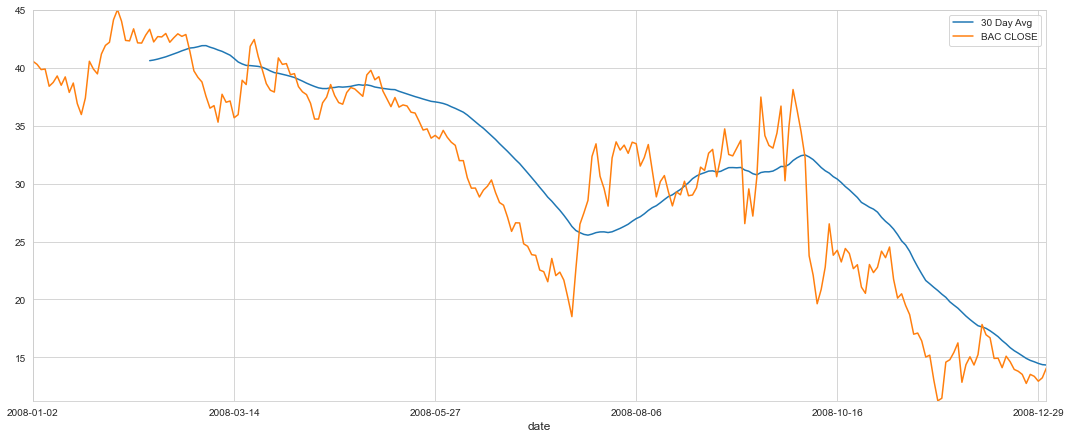

In [121]:
plt.figure(figsize=(15,6))

BAC['Close']["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']["2008-01-01":"2009-01-01"].plot(label='BAC CLOSE')

#plt.xticks(BAC.index)

plt.margins(x=0, y=0)
plt.tight_layout()
plt.xlabel('date', fontsize=12)
plt.legend()

'''
Struggling with the x coordinates: more x ticks? how to change 2008-01 to Jan 2008?
'''

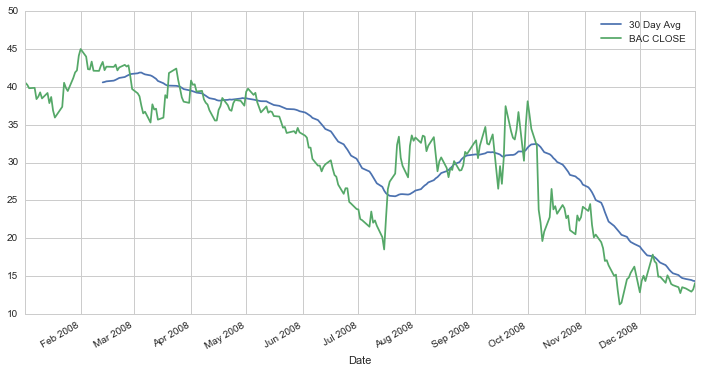

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

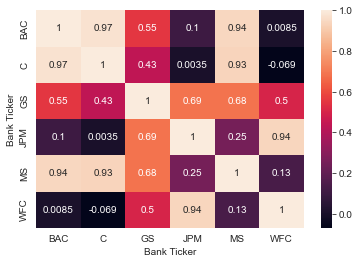

In [122]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

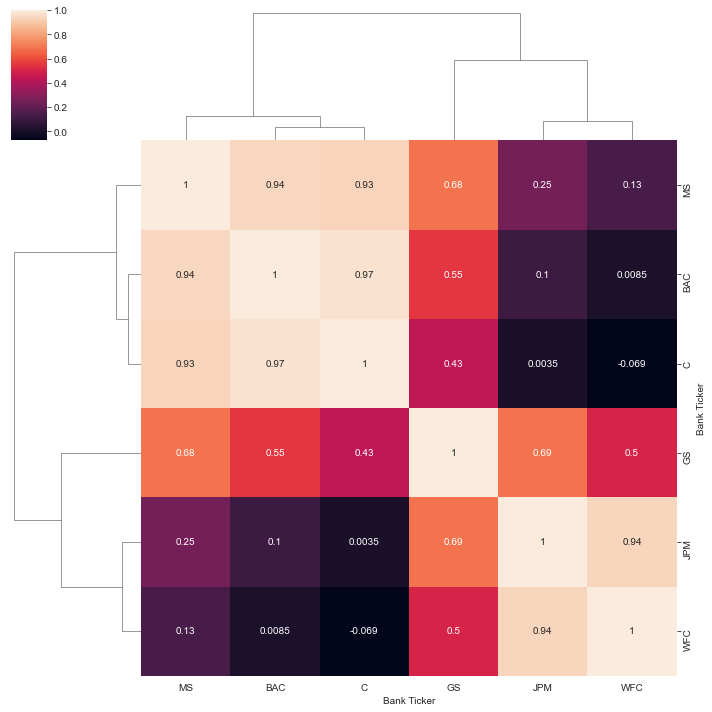

In [123]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [124]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [126]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [127]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [129]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.